In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
shp_path = "./us_data/tl_2017_us_state.shp"
sf = shp.Reader(shp_path)

In [4]:
print(len(sf.shapes()))

56


In [5]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    
    return df

In [6]:
df = read_shapefile(sf)
print(df.shape)

(56, 15)


In [7]:
df

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,coords
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"[(-81.747254, 39.095379), (-81.746354, 39.0965..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"[(-82.987477, 24.625379), (-82.987477, 24.6254..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"[(-91.185295, 40.637803), (-91.1751, 40.643027..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"[(-96.784381, 46.630503999999995), (-96.784337..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"[(-77.45880799999999, 39.22027), (-77.45866099..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677997539,1323452846,+41.5974187,-071.5272723,"[(-71.67880699999999, 41.158912), (-71.676264,..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214048160737,2393355752,+44.3484222,-114.5588538,"[(-116.899711, 44.840609), (-116.89967, 44.840..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23187445452,1028643155,+43.6726907,-071.5843145,"[(-72.329899, 43.600214), (-72.329838, 43.6002..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125919712692,13470113896,+35.5397100,-079.1308636,"[(-82.416738, 36.072827), (-82.416601, 36.0730..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23873457570,1031134839,+44.0604795,-072.6733274,"[(-73.313283, 44.26413), (-73.312741, 44.26541..."


In [8]:
def fip_to_state(fip):
    fip = str(fip)
    if len(fip) < 2:
        fip = '0' + fip
     
    print(fip, df[df.GEOID == fip].index)
    return df[df.GEOID == fip].index.values[0]

In [9]:
def state_to_id(state):
    return df[df.NAME == state].index.values[0]

In [10]:
def plot_shape(id, s=None):
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points), 1))
    y_lat = np.zeros((len(shape_ex.points), 1))
    
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
        
    plt.plot(x_lon, y_lat)
    plt.xlim(shape_ex.bbox[0], shape_ex.bbox[2])
    return x0, y0

In [11]:
def plot(title, ids, sf, x_lim=None, y_lim=None, figsize=(11,9), color='r'):
       
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(title, fontsize=16)
    

    s_id = 0
    for shape in sf.shapeRecords():
        if(s_id not in no_print):
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            plt.plot(x, y, 'k')
        s_id = s_id + 1

    for id in ids:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon, y_lat, color)
        
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [12]:
def remove_dups(data):
    da = []
    for d in data:
        if(d in da):
            pass
        else:
            da.append(d)
    return da

In [13]:
def lists_to_listi(ls):
    li = []
    for e in ls:
        li.append(int(e))
    return li

In [14]:
from colour import Color
def colors_calc(data, c1, c2):
    vals = lists_to_listi(data.values())
    rd = remove_dups(sorted(vals))
    da = sorted(vals)
    cs = {}
    c = Color(c1)
    colors = list(c.range_to(Color(c2), len(rd)))

    prev = 0
    dups = 0
    for i in range(len(da)):
        if i == 0:
            cs[da[i]] = colors[i].hex
        else:
            if da[prev] != da[i]:
                cs[da[i]] = colors[(i - dups)].hex
            else:
                dups += 1
        prev = i

    cs[0] = "#ffffff"
#     Un-comment below to see a graphical representation of the gradient colors used.
#     sns.palplot(list(cs.values()), 0.1 * len(rd))
    return cs

In [15]:
def sid_to_s(sid):
    n = df['NAME']
    return n[sid]

In [16]:
## THIS_

def plot_states_data(sf, title, states, data, print_id=False, save_fig=True):
    colors = colors_calc(data, "green", "red")
    df = read_shapefile(sf)
    state_id = []
    
    no_print = ["Hawaii", "Guam", "Puerto Rico", "Alaska", "Northern Mariana Islands", "Virgin Islands"]
    for i in range(len(states)):
        if(not (df[df.NAME == states[i]].empty) and states[i] not in no_print):
            state_id.append(df[df.NAME == states[i]].index.values[0])
    plot_map_fill_multiple_ids_tone(sf, title, state_id, data, print_id, colors, x_lim = None, y_lim = None, savefigb=save_fig)

In [17]:
def state_sipf(state):
    sq = {
        'Alabama': '2020-04-04',
        'Arizona': '2020-03-31',
        'California': '2020-03-19',
        'Arizona': '2020-03-31',
        'Colorado': '2020-03-26',
        'Connecticut': '2020-03-23',
        'Delaware': '2020-03-24',
        'District of Columbia': '2020-04-01',
        'Florida': '2020-04-03',
        'Georgia': '2020-04-03',
        'Idaho': '2020-03-25',
        'Illinois': '2020-03-31',
        'Indiana': '2020-03-24',
        'Kansas': '2020-03-30',
        'Kentucky': '2020-03-26',
        'Louisiana': '2020-03-23',
        'Maine': '2020-04-02',
        'Maryland': '2020-03-30',
        'Massachusetts': '2020-03-24',
        'Minnesota': '2020-03-27',
        'Mississippi': '2020-04-03',
        'Missouri': '2020-04-06',
        'Montana': '2020-03-28',
        'Nevada': '2020-04-01',
        'New Hampshire': '2020-03-27',
        'New Jersey': '2020-03-21',
        'New Mexico': '2020-03-24',
        'New York': '2020-03-22',
        'North Carolina': '2020-03-23',
        'Ohio': '2020-03-23',
        'Oregon': '2020-03-23',
        'Pennsylvania': '2020-04-01',
        'Rhode Island': '2020-03-28',
        'Tennessee': '2020-03-31',
        'Vermont': '2020-03-25',
        'Virginia': '2020-03-30',
        'Washington': '2020-03-23',
        'West Virginia': '2020-03-24',
        'Wisconsin': '2020-03-25',
        'Wyoming': '2020-03-28',   
    }
    
    states_sip = sq.keys()
    if state not in states_sip:
        return None
    else:
        return get_date(sq[state])

In [28]:
def plot_map_fill_multiple_ids_tone(sf, title, state, data, print_id, colors, x_lim =None, y_lim =None, figsize = (11,9), savefigb=True):
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots(figsize = figsize, dpi=75)
    fig.suptitle(str(title) + ' num. of cases', fontsize=16)
    ax.set_aspect('equal')
    
    sip = []
    
    for i in range(len(state)):
        id = state[i]
        state_name = sid_to_s(id)
        cases = int(data[state_name])
        
#         print(state_name, id)
        
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        
        
        ax.fill(x_lon,y_lat, colors[cases])
        
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            ''' str(cases)'''
            plt.text(x0, y0,  str(cases), fontsize='smaller', va='center', ha='center')
    
    no_print = [40, 31, 41, 35, 36, 49, 34]
    s_id = 0
    for shape in sf.shapeRecords():
        if(s_id not in no_print):
            
            sn = sid_to_s(s_id)
            ss = state_sipf(sn)
            
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            if ss is not None:
                if ss == title or title > ss:
#                     print(sn, "SIP")
                    ax.plot(x, y, c='#0000ff', linewidth=2)
                else:
                    ax.plot(x, y, 'k')
            else:
                if title == get_date('2020-04-05'):
                    ax.plot(x, y, c='#ff0000')
                else:
                    ax.plot(x, y, c='k')
        
        s_id = s_id + 1
    

        if (x_lim != None) & (y_lim != None):     
            plt.xlim(x_lim)
            plt.ylim(y_lim)
        if savefigb:
            fig.savefig('./photos/sip/' + str(title))
            plt.close(fig)

        

In [29]:
import csv
import datetime

In [30]:
def get_date(s):
    return datetime.datetime.strptime(s, '%Y-%m-%d')

In [31]:
def get_date_from_covid(ind, file='us-states-covid.csv'):
    i = 0
    pd = get_date('2019-12-30')
    with open(file) as cf:
        cr = csv.reader(cf, delimiter=',')
        for r in cr:
            if r[0] == 'date':
                pass
            else:
                date = get_date(r[0])

                #  Next Day
                if date > pd:
                    if i == ind:
                        return date
                    i += 1
                    pd = date

In [32]:
def parse_covid(file):
    dates = []
    with open(file) as cf:
        cols = []
        cr = csv.reader(cf, delimiter=',')
        
        lc = 0
        prev_date = get_date('2019-12-30')
        i = -1

        for r in cr:
            if lc == 0:
                cols = r
                print(f'{cols}')
                lc += 1
            else:
                date = get_date(r[0])
                # print(prev_date, date)
                
                #  Next Day
                if date > prev_date:
                    # print('New day')
                    i += 1
                    prev_date = date
                    dates.append([])
                    dates[i].append([r[1], r[3]])

                # Same day
                elif date == prev_date:
                    dates[i].append([r[1], r[3]])
                else:
                    print("ERROR")
                    exit(0)
                    
                lc += 1
        print(f'Processed {lc} lines')
        return dates

In [33]:
cases = parse_covid('us-states-covid.csv')

['date', 'state', 'fips', 'cases', 'deaths']
Processed 5130 lines


In [34]:
def create_dict(cases):
    ca = {}
    for c in cases:
        ca[c[0]] = c[1]
    return ca

In [35]:
def parse_date_entry(ca):
    states = []
    cases = []
    
    for c in ca:
        states.append(c[0])
        cases.append(int(c[1]))
    return states, cases

In [36]:
def show_covid(i, _cases):
    states, _ = parse_date_entry(_cases[i])
    cases = create_dict(_cases[i])
    date = get_date_from_covid(i)
    print(cases, date)
    
    plot_states_data(sf, date, states, cases, True, save_fig=True)

{'Alabama': '18851', 'Alaska': '516', 'Arizona': '22245', 'Arkansas': '8067', 'California': '120407', 'Colorado': '27046', 'Connecticut': '43091', 'Delaware': '9712', 'District of Columbia': '9016', 'Florida': '58756', 'Georgia': '46711', 'Guam': '1146', 'Hawaii': '643', 'Idaho': '2990', 'Illinois': '124279', 'Indiana': '36609', 'Iowa': '20376', 'Kansas': '10281', 'Kentucky': '10485', 'Louisiana': '41244', 'Maine': '2418', 'Maryland': '55617', 'Massachusetts': '101592', 'Michigan': '58990', 'Minnesota': '25881', 'Mississippi': '16322', 'Missouri': '14020', 'Montana': '525', 'Nebraska': '14866', 'Nevada': '8950', 'New Hampshire': '4795', 'New Jersey': '162068', 'New Mexico': '8140', 'New York': '378924', 'North Carolina': '31013', 'North Dakota': '2682', 'Northern Mariana Islands': '24', 'Ohio': '36792', 'Oklahoma': '6805', 'Oregon': '4399', 'Pennsylvania': '77871', 'Puerto Rico': '4023', 'Rhode Island': '15219', 'South Carolina': '12651', 'South Dakota': '5162', 'Tennessee': '25024', '

ValueError: Unrecognized character # in format string

<Figure size 792x648 with 0 Axes>

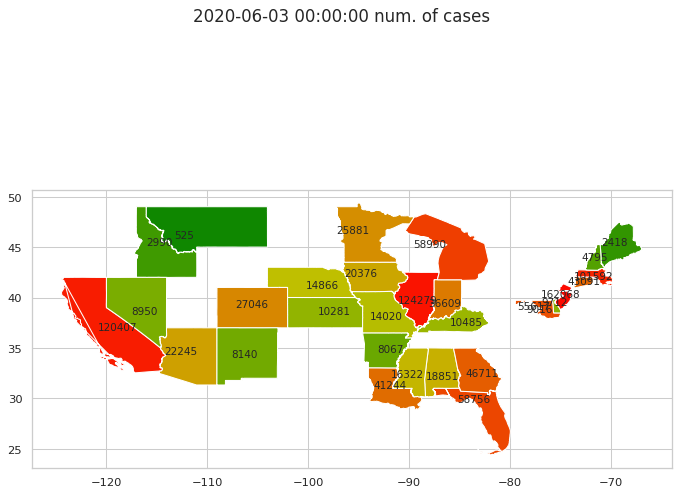

In [37]:
import time
start_time = time.time()
show_covid(len(cases)-1, cases)
print("--- %s seconds ---" % (time.time() - start_time))

In [428]:
from tqdm import tqdm
for i in tqdm(range(len(cases))):
    show_covid(i, cases)

  0%|          | 0/76 [00:00<?, ?it/s]

{'Washington': '1'} 2020-01-21 00:00:00


  1%|▏         | 1/76 [00:07<09:17,  7.43s/it]

{'Washington': '1'} 2020-01-22 00:00:00


  3%|▎         | 2/76 [00:15<09:12,  7.47s/it]

{'Washington': '1'} 2020-01-23 00:00:00


  4%|▍         | 3/76 [00:23<09:29,  7.80s/it]

{'Illinois': '1', 'Washington': '1'} 2020-01-24 00:00:00


  5%|▌         | 4/76 [00:31<09:21,  7.80s/it]

{'California': '1', 'Illinois': '1', 'Washington': '1'} 2020-01-25 00:00:00


  7%|▋         | 5/76 [00:39<09:20,  7.89s/it]

{'Arizona': '1', 'California': '2', 'Illinois': '1', 'Washington': '1'} 2020-01-26 00:00:00


  8%|▊         | 6/76 [00:48<09:30,  8.14s/it]

{'Arizona': '1', 'California': '2', 'Illinois': '1', 'Washington': '1'} 2020-01-27 00:00:00


  9%|▉         | 7/76 [00:59<10:30,  9.14s/it]

{'Arizona': '1', 'California': '2', 'Illinois': '1', 'Washington': '1'} 2020-01-28 00:00:00


 11%|█         | 8/76 [01:09<10:43,  9.47s/it]

{'Arizona': '1', 'California': '2', 'Illinois': '1', 'Washington': '1'} 2020-01-29 00:00:00


 12%|█▏        | 9/76 [01:18<10:22,  9.29s/it]

{'Arizona': '1', 'California': '2', 'Illinois': '2', 'Washington': '1'} 2020-01-30 00:00:00


 13%|█▎        | 10/76 [01:27<10:09,  9.24s/it]

{'Arizona': '1', 'California': '3', 'Illinois': '2', 'Washington': '1'} 2020-01-31 00:00:00


 14%|█▍        | 11/76 [01:35<09:36,  8.87s/it]

{'Arizona': '1', 'California': '3', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1'} 2020-02-01 00:00:00


 16%|█▌        | 12/76 [01:43<09:09,  8.59s/it]

{'Arizona': '1', 'California': '6', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1'} 2020-02-02 00:00:00


 17%|█▋        | 13/76 [01:52<08:59,  8.56s/it]

{'Arizona': '1', 'California': '6', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1'} 2020-02-03 00:00:00


 18%|█▊        | 14/76 [02:02<09:18,  9.00s/it]

{'Arizona': '1', 'California': '6', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1'} 2020-02-04 00:00:00


 20%|█▉        | 15/76 [02:12<09:28,  9.32s/it]

{'Arizona': '1', 'California': '6', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1', 'Wisconsin': '1'} 2020-02-05 00:00:00


 21%|██        | 16/76 [02:21<09:11,  9.19s/it]

{'Arizona': '1', 'California': '6', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1', 'Wisconsin': '1'} 2020-02-06 00:00:00


 22%|██▏       | 17/76 [02:29<08:48,  8.96s/it]

{'Arizona': '1', 'California': '6', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1', 'Wisconsin': '1'} 2020-02-07 00:00:00


 24%|██▎       | 18/76 [02:38<08:39,  8.96s/it]

{'Arizona': '1', 'California': '6', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1', 'Wisconsin': '1'} 2020-02-08 00:00:00


 25%|██▌       | 19/76 [02:47<08:22,  8.82s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '6', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1', 'Wisconsin': '1'} 2020-02-09 00:00:00


 26%|██▋       | 20/76 [02:56<08:14,  8.83s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '7', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1', 'Wisconsin': '1'} 2020-02-10 00:00:00


 28%|██▊       | 21/76 [03:04<08:03,  8.79s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '7', 'Illinois': '2', 'Massachusetts': '1', 'Washington': '1', 'Wisconsin': '1'} 2020-02-11 00:00:00


 29%|██▉       | 22/76 [03:14<08:02,  8.94s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '7', 'Illinois': '2', 'Massachusetts': '1', 'Texas': '1', 'Washington': '1', 'Wisconsin': '1'} 2020-02-12 00:00:00


 30%|███       | 23/76 [03:23<08:07,  9.20s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '7', 'Illinois': '2', 'Massachusetts': '1', 'Texas': '2', 'Washington': '1', 'Wisconsin': '1'} 2020-02-13 00:00:00


 32%|███▏      | 24/76 [03:33<08:10,  9.43s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '7', 'Illinois': '2', 'Massachusetts': '1', 'Texas': '2', 'Washington': '1', 'Wisconsin': '1'} 2020-02-14 00:00:00


 33%|███▎      | 25/76 [03:43<08:05,  9.52s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '7', 'Illinois': '2', 'Massachusetts': '1', 'Texas': '2', 'Washington': '1', 'Wisconsin': '1'} 2020-02-15 00:00:00


 34%|███▍      | 26/76 [03:52<07:51,  9.44s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '7', 'Illinois': '2', 'Massachusetts': '1', 'Texas': '2', 'Washington': '1', 'Wisconsin': '1'} 2020-02-16 00:00:00


 36%|███▌      | 27/76 [04:02<07:45,  9.50s/it]

{'Arizona': '1', 'California': '7', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '10', 'Texas': '2', 'Washington': '1', 'Wisconsin': '1'} 2020-02-17 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 37%|███▋      | 28/76 [04:12<07:51,  9.82s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

{'Arizona': '1', 'California': '7', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '10', 'Texas': '2', 'Washington': '1', 'Wisconsin': '1'} 2020-02-18 00:00:00


 38%|███▊      | 29/76 [04:24<08:07, 10.38s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '7', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '10', 'Texas': '2', 'Washington': '1', 'Wisconsin': '1'} 2020-02-19 00:00:00


 39%|███▉      | 30/76 [04:35<08:03, 10.51s/it]

{'Arizona': '1', 'California': '8', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '11', 'Texas': '2', 'Washington': '1', 'Wisconsin': '1'} 2020-02-20 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 41%|████      | 31/76 [04:49<08:44, 11.67s/it]

{'Arizona': '1', 'California': '9', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '11', 'Texas': '4', 'Washington': '1', 'Wisconsin': '1'} 2020-02-21 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 42%|████▏     | 32/76 [05:03<08:56, 12.19s/it]

{'Arizona': '1', 'California': '9', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '11', 'Texas': '4', 'Washington': '1', 'Wisconsin': '1'} 2020-02-22 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 43%|████▎     | 33/76 [05:14<08:37, 12.03s/it]

{'Arizona': '1', 'California': '9', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '11', 'Texas': '4', 'Washington': '1', 'Wisconsin': '1'} 2020-02-23 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 45%|████▍     | 34/76 [05:27<08:34, 12.24s/it]

{'Arizona': '1', 'California': '11', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '12', 'Texas': '10', 'Washington': '5', 'Wisconsin': '1'} 2020-02-24 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 46%|████▌     | 35/76 [05:40<08:31, 12.47s/it]

{'Arizona': '1', 'California': '11', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '13', 'Texas': '10', 'Utah': '1', 'Washington': '5', 'Wisconsin': '1'} 2020-02-25 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 47%|████▋     | 36/76 [05:53<08:20, 12.52s/it]

{'Arizona': '1', 'California': '26', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '13', 'Texas': '10', 'Utah': '1', 'Washington': '5', 'Wisconsin': '1'} 2020-02-26 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 49%|████▊     | 37/76 [06:05<08:04, 12.43s/it]

{'Arizona': '1', 'California': '26', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '13', 'Texas': '10', 'Utah': '1', 'Washington': '5', 'Wisconsin': '1'} 2020-02-27 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 50%|█████     | 38/76 [06:17<07:44, 12.22s/it]

{'Arizona': '1', 'California': '27', 'Illinois': '2', 'Massachusetts': '1', 'Nebraska': '13', 'Oregon': '1', 'Texas': '11', 'Utah': '1', 'Washington': '7', 'Wisconsin': '1'} 2020-02-28 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 51%|█████▏    | 39/76 [06:28<07:24, 12.02s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

{'Arizona': '1', 'California': '28', 'Illinois': '3', 'Massachusetts': '1', 'Nebraska': '13', 'Oregon': '1', 'Texas': '11', 'Utah': '1', 'Washington': '10', 'Wisconsin': '1'} 2020-02-29 00:00:00


 53%|█████▎    | 40/76 [06:40<07:12, 12.02s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '33', 'Florida': '2', 'Illinois': '3', 'Massachusetts': '1', 'Nebraska': '13', 'New York': '1', 'Oregon': '2', 'Rhode Island': '2', 'Texas': '11', 'Utah': '1', 'Washington': '17', 'Wisconsin': '1'} 2020-03-01 00:00:00


 54%|█████▍    | 41/76 [06:51<06:51, 11.77s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '1', 'California': '38', 'Florida': '2', 'Georgia': '2', 'Illinois': '4', 'Massachusetts': '2', 'Nebraska': '13', 'New Hampshire': '1', 'New York': '1', 'Oregon': '2', 'Rhode Island': '2', 'Texas': '11', 'Utah': '1', 'Washington': '23', 'Wisconsin': '1'} 2020-03-02 00:00:00


 55%|█████▌    | 42/76 [07:03<06:38, 11.71s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '2', 'California': '45', 'Florida': '3', 'Georgia': '2', 'Illinois': '4', 'Massachusetts': '2', 'Nebraska': '13', 'New Hampshire': '2', 'New York': '2', 'North Carolina': '1', 'Oregon': '2', 'Rhode Island': '2', 'Texas': '11', 'Utah': '1', 'Washington': '32', 'Wisconsin': '1'} 2020-03-03 00:00:00


 57%|█████▋    | 43/76 [07:17<06:49, 12.40s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '2', 'California': '55', 'Florida': '3', 'Georgia': '2', 'Illinois': '4', 'Massachusetts': '2', 'Nebraska': '13', 'New Hampshire': '2', 'New Jersey': '1', 'New York': '11', 'North Carolina': '1', 'Oregon': '2', 'Rhode Island': '2', 'Texas': '12', 'Utah': '1', 'Washington': '47', 'Wisconsin': '1'} 2020-03-04 00:00:00


 58%|█████▊    | 44/76 [07:29<06:31, 12.23s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '2', 'California': '67', 'Colorado': '2', 'Florida': '4', 'Georgia': '2', 'Illinois': '5', 'Maryland': '3', 'Massachusetts': '3', 'Nebraska': '13', 'Nevada': '2', 'New Hampshire': '2', 'New Jersey': '2', 'New York': '22', 'North Carolina': '1', 'Oregon': '2', 'Rhode Island': '2', 'Tennessee': '1', 'Texas': '16', 'Utah': '1', 'Washington': '75', 'Wisconsin': '1'} 2020-03-05 00:00:00


 59%|█████▉    | 45/76 [07:42<06:30, 12.61s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '3', 'California': '81', 'Colorado': '8', 'Florida': '7', 'Georgia': '3', 'Hawaii': '1', 'Illinois': '6', 'Indiana': '1', 'Kentucky': '1', 'Maryland': '3', 'Massachusetts': '8', 'Minnesota': '1', 'Nebraska': '14', 'Nevada': '2', 'New Hampshire': '2', 'New Jersey': '4', 'New York': '44', 'North Carolina': '2', 'Oklahoma': '1', 'Oregon': '2', 'Pennsylvania': '2', 'Rhode Island': '3', 'South Carolina': '2', 'Tennessee': '1', 'Texas': '19', 'Utah': '3', 'Washington': '86', 'Wisconsin': '1'} 2020-03-06 00:00:00


 61%|██████    | 46/76 [07:57<06:39, 13.31s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '5', 'California': '100', 'Colorado': '8', 'District of Columbia': '1', 'Florida': '12', 'Georgia': '7', 'Hawaii': '1', 'Illinois': '6', 'Indiana': '1', 'Kansas': '1', 'Kentucky': '1', 'Maryland': '3', 'Massachusetts': '13', 'Minnesota': '1', 'Missouri': '1', 'Nebraska': '14', 'Nevada': '2', 'New Hampshire': '4', 'New Jersey': '4', 'New York': '89', 'North Carolina': '2', 'Oklahoma': '1', 'Oregon': '6', 'Pennsylvania': '4', 'Rhode Island': '3', 'South Carolina': '2', 'Tennessee': '1', 'Texas': '19', 'Utah': '3', 'Vermont': '1', 'Virginia': '1', 'Washington': '110', 'Wisconsin': '1'} 2020-03-07 00:00:00


 62%|██████▏   | 47/76 [08:14<06:51, 14.20s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


{'Arizona': '5', 'California': '112', 'Colorado': '8', 'Connecticut': '1', 'District of Columbia': '1', 'Florida': '13', 'Georgia': '11', 'Hawaii': '2', 'Illinois': '7', 'Indiana': '2', 'Iowa': '3', 'Kansas': '1', 'Kentucky': '4', 'Maryland': '5', 'Massachusetts': '28', 'Minnesota': '2', 'Missouri': '1', 'Nebraska': '16', 'Nevada': '4', 'New Hampshire': '4', 'New Jersey': '6', 'New York': '106', 'North Carolina': '2', 'Oklahoma': '1', 'Oregon': '13', 'Pennsylvania': '6', 'Rhode Island': '3', 'South Carolina': '6', 'Tennessee': '3', 'Texas': '23', 'Utah': '3', 'Vermont': '1', 'Virginia': '2', 'Washington': '141', 'Wisconsin': '1'} 2020-03-08 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 63%|██████▎   | 48/76 [08:30<06:57, 14.89s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

{'Arizona': '6', 'California': '172', 'Colorado': '12', 'Connecticut': '2', 'District of Columbia': '4', 'Florida': '14', 'Georgia': '17', 'Hawaii': '2', 'Illinois': '11', 'Indiana': '4', 'Iowa': '8', 'Kansas': '1', 'Kentucky': '5', 'Louisiana': '1', 'Maryland': '6', 'Massachusetts': '41', 'Minnesota': '2', 'Missouri': '1', 'Nebraska': '16', 'Nevada': '4', 'New Hampshire': '4', 'New Jersey': '11', 'New York': '142', 'North Carolina': '7', 'Ohio': '3', 'Oklahoma': '1', 'Oregon': '13', 'Pennsylvania': '10', 'Rhode Island': '3', 'South Carolina': '7', 'Tennessee': '4', 'Texas': '24', 'Utah': '3', 'Vermont': '1', 'Virginia': '5', 'Washington': '179', 'Wisconsin': '2'} 2020-03-09 00:00:00


 64%|██████▍   | 49/76 [08:47<07:00, 15.56s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '6', 'California': '179', 'Colorado': '17', 'Connecticut': '2', 'District of Columbia': '4', 'Florida': '23', 'Georgia': '22', 'Hawaii': '2', 'Illinois': '19', 'Indiana': '6', 'Iowa': '13', 'Kansas': '1', 'Kentucky': '7', 'Louisiana': '6', 'Maryland': '9', 'Massachusetts': '92', 'Michigan': '2', 'Minnesota': '3', 'Missouri': '1', 'Nebraska': '17', 'Nevada': '4', 'New Hampshire': '5', 'New Jersey': '15', 'New York': '173', 'North Carolina': '7', 'Ohio': '3', 'Oklahoma': '2', 'Oregon': '14', 'Pennsylvania': '12', 'Rhode Island': '5', 'South Carolina': '9', 'South Dakota': '5', 'Tennessee': '7', 'Texas': '31', 'Utah': '4', 'Vermont': '1', 'Virginia': '8', 'Washington': '279', 'Wisconsin': '3'} 2020-03-10 00:00:00


 66%|██████▌   | 50/76 [09:06<07:06, 16.39s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Arizona': '9', 'Arkansas': '1', 'California': '202', 'Colorado': '34', 'Connecticut': '3', 'Delaware': '1', 'District of Columbia': '10', 'Florida': '26', 'Georgia': '31', 'Hawaii': '2', 'Illinois': '25', 'Indiana': '11', 'Iowa': '14', 'Kansas': '1', 'Kentucky': '7', 'Louisiana': '13', 'Maryland': '13', 'Massachusetts': '95', 'Michigan': '2', 'Minnesota': '5', 'Mississippi': '1', 'Missouri': '1', 'Nebraska': '23', 'Nevada': '7', 'New Hampshire': '5', 'New Jersey': '23', 'New Mexico': '4', 'New York': '217', 'North Carolina': '8', 'North Dakota': '1', 'Ohio': '4', 'Oklahoma': '2', 'Oregon': '20', 'Pennsylvania': '16', 'Rhode Island': '5', 'South Carolina': '10', 'South Dakota': '8', 'Tennessee': '8', 'Texas': '33', 'Utah': '5', 'Vermont': '2', 'Virginia': '10', 'Washington': '338', 'Wisconsin': '6', 'Wyoming': '1'} 2020-03-11 00:00:00


 67%|██████▋   | 51/76 [09:26<07:20, 17.60s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Alaska': '1', 'Arizona': '9', 'Arkansas': '6', 'California': '252', 'Colorado': '49', 'Connecticut': '6', 'Delaware': '4', 'District of Columbia': '10', 'Florida': '46', 'Georgia': '31', 'Hawaii': '2', 'Illinois': '32', 'Indiana': '12', 'Iowa': '16', 'Kansas': '5', 'Kentucky': '11', 'Louisiana': '14', 'Maine': '1', 'Maryland': '13', 'Massachusetts': '108', 'Michigan': '12', 'Minnesota': '9', 'Mississippi': '1', 'Missouri': '2', 'Nebraska': '24', 'Nevada': '11', 'New Hampshire': '6', 'New Jersey': '29', 'New Mexico': '6', 'New York': '326', 'North Carolina': '16', 'North Dakota': '1', 'Ohio': '5', 'Oklahoma': '2', 'Oregon': '30', 'Pennsylvania': '22', 'Rhode Island': '5', 'South Carolina': '12', 'South Dakota': '8', 'Tennessee': '18', 'Texas': '41', 'Utah': '7', 'Vermont': '2', 'Virginia': '17', 'Washington': '419', 'Wisconsin': '8', 'Wyoming': '1'} 2020-03-12 00:00:00


 68%|██████▊   | 52/76 [09:46<07:23, 18.47s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Alabama': '6', 'Alaska': '1', 'Arizona': '9', 'Arkansas': '7', 'California': '320', 'Colorado': '78', 'Connecticut': '11', 'Delaware': '4', 'District of Columbia': '10', 'Florida': '70', 'Georgia': '41', 'Hawaii': '2', 'Idaho': '1', 'Illinois': '46', 'Indiana': '12', 'Iowa': '17', 'Kansas': '6', 'Kentucky': '11', 'Louisiana': '36', 'Maine': '2', 'Maryland': '18', 'Massachusetts': '123', 'Michigan': '25', 'Minnesota': '14', 'Mississippi': '6', 'Missouri': '4', 'Montana': '4', 'Nebraska': '27', 'Nevada': '19', 'New Hampshire': '7', 'New Jersey': '50', 'New Mexico': '10', 'New York': '421', 'North Carolina': '18', 'North Dakota': '1', 'Ohio': '13', 'Oklahoma': '3', 'Oregon': '30', 'Pennsylvania': '41', 'Puerto Rico': '3', 'Rhode Island': '20', 'South Carolina': '13', 'South Dakota': '9', 'Tennessee': '26', 'Texas': '58', 'Utah': '7', 'Vermont': '2', 'Virginia': '30', 'Washington': '511', 'Wisconsin': '19', 'Wyoming': '2'} 2020-03-13 00:00:00


 70%|██████▉   | 53/76 [10:09<07:33, 19.73s/it]

{'Alabama': '12', 'Alaska': '1', 'Arizona': '12', 'Arkansas': '9', 'California': '381', 'Colorado': '103', 'Connecticut': '20', 'Delaware': '4', 'District of Columbia': '16', 'Florida': '70', 'Georgia': '65', 'Hawaii': '4', 'Idaho': '5', 'Illinois': '66', 'Indiana': '15', 'Iowa': '18', 'Kansas': '8', 'Kentucky': '18', 'Louisiana': '77', 'Maine': '3', 'Maryland': '27', 'Massachusetts': '138', 'Michigan': '33', 'Minnesota': '21', 'Mississippi': '6', 'Missouri': '5', 'Montana': '6', 'Nebraska': '29', 'Nevada': '21', 'New Hampshire': '7', 'New Jersey': '75', 'New Mexico': '13', 'New York': '610', 'North Carolina': '25', 'North Dakota': '1', 'Ohio': '26', 'Oklahoma': '4', 'Oregon': '36', 'Pennsylvania': '47', 'Puerto Rico': '4', 'Rhode Island': '20', 'South Carolina': '19', 'South Dakota': '9', 'Tennessee': '32', 'Texas': '69', 'Utah': '21', 'Vermont': '5', 'Virgin Islands': '1', 'Virginia': '42', 'Washington': '609', 'Wisconsin': '27', 'Wyoming': '3'} 2020-03-14 00:00:00


/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 71%|███████   | 54/76 [10:33<07:43, 21.07s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

{'Alabama': '23', 'Alaska': '1', 'Arizona': '13', 'Arkansas': '16', 'California': '478', 'Colorado': '136', 'Connecticut': '26', 'Delaware': '7', 'District of Columbia': '17', 'Florida': '109', 'Georgia': '97', 'Guam': '3', 'Hawaii': '7', 'Idaho': '5', 'Illinois': '94', 'Indiana': '19', 'Iowa': '22', 'Kansas': '9', 'Kentucky': '21', 'Louisiana': '103', 'Maine': '12', 'Maryland': '32', 'Massachusetts': '164', 'Michigan': '53', 'Minnesota': '35', 'Mississippi': '10', 'Missouri': '5', 'Montana': '6', 'Nebraska': '31', 'Nevada': '26', 'New Hampshire': '13', 'New Jersey': '98', 'New Mexico': '17', 'New York': '732', 'North Carolina': '32', 'North Dakota': '1', 'Ohio': '37', 'Oklahoma': '8', 'Oregon': '39', 'Pennsylvania': '68', 'Puerto Rico': '5', 'Rhode Island': '20', 'South Carolina': '28', 'South Dakota': '9', 'Tennessee': '39', 'Texas': '80', 'Utah': '29', 'Vermont': '8', 'Virgin Islands': '1', 'Virginia': '45', 'Washington': '675', 'Wisconsin': '33', 'Wyoming': '3'} 2020-03-15 00:00:00

 72%|███████▏  | 55/76 [10:54<07:22, 21.08s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Alabama': '29', 'Alaska': '3', 'Arizona': '18', 'Arkansas': '22', 'California': '588', 'Colorado': '161', 'Connecticut': '41', 'Delaware': '8', 'District of Columbia': '22', 'Florida': '141', 'Georgia': '118', 'Guam': '3', 'Hawaii': '10', 'Idaho': '5', 'Illinois': '104', 'Indiana': '24', 'Iowa': '22', 'Kansas': '11', 'Kentucky': '22', 'Louisiana': '137', 'Maine': '17', 'Maryland': '39', 'Massachusetts': '197', 'Michigan': '54', 'Minnesota': '54', 'Mississippi': '12', 'Missouri': '9', 'Montana': '8', 'Nebraska': '33', 'Nevada': '45', 'New Hampshire': '17', 'New Jersey': '176', 'New Mexico': '21', 'New York': '950', 'North Carolina': '34', 'North Dakota': '1', 'Ohio': '50', 'Oklahoma': '10', 'Oregon': '46', 'Pennsylvania': '81', 'Puerto Rico': '5', 'Rhode Island': '21', 'South Carolina': '33', 'South Dakota': '10', 'Tennessee': '52', 'Texas': '87', 'Utah': '40', 'Vermont': '12', 'Virgin Islands': '2', 'Virginia': '51', 'Washington': '794', 'Wisconsin': '47', 'Wyoming': '10'} 2020-03-16

 74%|███████▎  | 56/76 [11:16<07:01, 21.10s/it]

{'Alabama': '39', 'Alaska': '6', 'Arizona': '20', 'Arkansas': '22', 'California': '732', 'Colorado': '183', 'Connecticut': '68', 'Delaware': '16', 'District of Columbia': '31', 'Florida': '210', 'Georgia': '142', 'Guam': '3', 'Hawaii': '14', 'Idaho': '9', 'Illinois': '159', 'Indiana': '30', 'Iowa': '29', 'Kansas': '17', 'Kentucky': '26', 'Louisiana': '196', 'Maine': '32', 'Maryland': '57', 'Massachusetts': '218', 'Michigan': '65', 'Minnesota': '60', 'Mississippi': '21', 'Missouri': '16', 'Montana': '8', 'Nebraska': '36', 'Nevada': '55', 'New Hampshire': '26', 'New Jersey': '268', 'New Mexico': '23', 'New York': '1374', 'North Carolina': '42', 'North Dakota': '5', 'Ohio': '67', 'Oklahoma': '18', 'Oregon': '66', 'Pennsylvania': '101', 'Puerto Rico': '5', 'Rhode Island': '23', 'South Carolina': '47', 'South Dakota': '11', 'Tennessee': '73', 'Texas': '106', 'Utah': '51', 'Vermont': '14', 'Virgin Islands': '2', 'Virginia': '67', 'Washington': '908', 'West Virginia': '1', 'Wisconsin': '72', 

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 75%|███████▌  | 57/76 [11:37<06:43, 21.23s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

{'Alabama': '51', 'Alaska': '9', 'Arizona': '28', 'Arkansas': '33', 'California': '893', 'Colorado': '216', 'Connecticut': '96', 'Delaware': '26', 'District of Columbia': '36', 'Florida': '326', 'Georgia': '193', 'Guam': '8', 'Hawaii': '16', 'Idaho': '11', 'Illinois': '286', 'Indiana': '39', 'Iowa': '38', 'Kansas': '22', 'Kentucky': '35', 'Louisiana': '280', 'Maine': '43', 'Maryland': '85', 'Massachusetts': '256', 'Michigan': '80', 'Minnesota': '77', 'Mississippi': '34', 'Missouri': '21', 'Montana': '12', 'Nebraska': '43', 'Nevada': '82', 'New Hampshire': '39', 'New Jersey': '427', 'New Mexico': '28', 'New York': '2382', 'North Carolina': '66', 'North Dakota': '7', 'Ohio': '90', 'Oklahoma': '29', 'Oregon': '74', 'Pennsylvania': '139', 'Puerto Rico': '5', 'Rhode Island': '33', 'South Carolina': '60', 'South Dakota': '11', 'Tennessee': '98', 'Texas': '166', 'Utah': '65', 'Vermont': '19', 'Virgin Islands': '3', 'Virginia': '78', 'Washington': '1026', 'West Virginia': '2', 'Wisconsin': '10

 76%|███████▋  | 58/76 [11:59<06:23, 21.31s/it]

{'Alabama': '78', 'Alaska': '12', 'Arizona': '47', 'Arkansas': '62', 'California': '1067', 'Colorado': '278', 'Connecticut': '159', 'Delaware': '30', 'District of Columbia': '68', 'Florida': '434', 'Georgia': '282', 'Guam': '12', 'Hawaii': '26', 'Idaho': '23', 'Illinois': '420', 'Indiana': '56', 'Iowa': '44', 'Kansas': '35', 'Kentucky': '47', 'Louisiana': '392', 'Maine': '52', 'Maryland': '108', 'Massachusetts': '328', 'Michigan': '334', 'Minnesota': '89', 'Mississippi': '50', 'Missouri': '35', 'Montana': '19', 'Nebraska': '47', 'Nevada': '99', 'New Hampshire': '44', 'New Jersey': '735', 'New Mexico': '35', 'New York': '4152', 'North Carolina': '104', 'North Dakota': '19', 'Ohio': '120', 'Oklahoma': '44', 'Oregon': '87', 'Pennsylvania': '187', 'Puerto Rico': '6', 'Rhode Island': '44', 'South Carolina': '81', 'South Dakota': '14', 'Tennessee': '155', 'Texas': '248', 'Utah': '80', 'Vermont': '22', 'Virgin Islands': '3', 'Virginia': '94', 'Washington': '1228', 'West Virginia': '5', 'Wisco

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 78%|███████▊  | 59/76 [12:21<06:05, 21.49s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

{'Alabama': '106', 'Alaska': '14', 'Arizona': '70', 'Arkansas': '100', 'California': '1283', 'Colorado': '364', 'Connecticut': '194', 'Delaware': '39', 'District of Columbia': '77', 'Florida': '564', 'Georgia': '482', 'Guam': '14', 'Hawaii': '37', 'Idaho': '31', 'Illinois': '583', 'Indiana': '79', 'Iowa': '45', 'Kansas': '49', 'Kentucky': '63', 'Louisiana': '537', 'Maine': '57', 'Maryland': '150', 'Massachusetts': '413', 'Michigan': '548', 'Minnesota': '115', 'Mississippi': '80', 'Missouri': '73', 'Montana': '19', 'Nebraska': '53', 'Nevada': '165', 'New Hampshire': '55', 'New Jersey': '896', 'New Mexico': '43', 'New York': '7102', 'North Carolina': '144', 'North Dakota': '27', 'Ohio': '169', 'Oklahoma': '49', 'Oregon': '114', 'Pennsylvania': '269', 'Puerto Rico': '14', 'Rhode Island': '44', 'South Carolina': '126', 'South Dakota': '14', 'Tennessee': '237', 'Texas': '377', 'Utah': '112', 'Vermont': '29', 'Virgin Islands': '6', 'Virginia': '115', 'Washington': '1404', 'West Virginia': '8

 79%|███████▉  | 60/76 [12:42<05:43, 21.50s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


{'Alabama': '131', 'Alaska': '21', 'Arizona': '104', 'Arkansas': '118', 'California': '1544', 'Colorado': '475', 'Connecticut': '223', 'Delaware': '45', 'District of Columbia': '98', 'Florida': '764', 'Georgia': '552', 'Guam': '15', 'Hawaii': '48', 'Idaho': '42', 'Illinois': '751', 'Indiana': '126', 'Iowa': '68', 'Kansas': '57', 'Kentucky': '84', 'Louisiana': '763', 'Maine': '70', 'Maryland': '195', 'Massachusetts': '525', 'Michigan': '787', 'Minnesota': '138', 'Mississippi': '140', 'Missouri': '93', 'Montana': '29', 'Nebraska': '61', 'Nevada': '165', 'New Hampshire': '65', 'New Jersey': '1336', 'New Mexico': '57', 'New York': '10356', 'North Carolina': '184', 'North Dakota': '28', 'Ohio': '247', 'Oklahoma': '53', 'Oregon': '137', 'Pennsylvania': '388', 'Puerto Rico': '21', 'Rhode Island': '66', 'South Carolina': '172', 'South Dakota': '14', 'Tennessee': '312', 'Texas': '547', 'Utah': '138', 'Vermont': '49', 'Virgin Islands': '6', 'Virginia': '152', 'Washington': '1655', 'West Virginia

 80%|████████  | 61/76 [13:04<05:22, 21.52s/it]

{'Alabama': '157', 'Alaska': '22', 'Arizona': '153', 'Arkansas': '165', 'California': '1851', 'Colorado': '591', 'Connecticut': '327', 'Delaware': '56', 'District of Columbia': '116', 'Florida': '1000', 'Georgia': '620', 'Guam': '27', 'Hawaii': '56', 'Idaho': '47', 'Illinois': '1047', 'Indiana': '201', 'Iowa': '90', 'Kansas': '66', 'Kentucky': '103', 'Louisiana': '837', 'Maine': '89', 'Maryland': '245', 'Massachusetts': '646', 'Michigan': '1033', 'Minnesota': '171', 'Mississippi': '207', 'Missouri': '130', 'Montana': '34', 'Nebraska': '62', 'Nevada': '190', 'New Hampshire': '78', 'New Jersey': '1914', 'New Mexico': '65', 'New York': '15168', 'North Carolina': '269', 'North Dakota': '30', 'Ohio': '351', 'Oklahoma': '67', 'Oregon': '161', 'Pennsylvania': '504', 'Puerto Rico': '23', 'Rhode Island': '83', 'South Carolina': '194', 'South Dakota': '21', 'Tennessee': '424', 'Texas': '632', 'Utah': '182', 'Vermont': '52', 'Virgin Islands': '17', 'Virginia': '219', 'Washington': '1844', 'West V

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 82%|████████▏ | 62/76 [13:25<05:02, 21.60s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

{'Alabama': '196', 'Alaska': '36', 'Arizona': '234', 'Arkansas': '201', 'California': '2240', 'Colorado': '721', 'Connecticut': '415', 'Delaware': '87', 'District of Columbia': '138', 'Florida': '1222', 'Georgia': '800', 'Guam': '29', 'Hawaii': '77', 'Idaho': '50', 'Illinois': '1285', 'Indiana': '259', 'Iowa': '105', 'Kansas': '82', 'Kentucky': '124', 'Louisiana': '1172', 'Maine': '107', 'Maryland': '290', 'Massachusetts': '777', 'Michigan': '1324', 'Minnesota': '235', 'Mississippi': '249', 'Missouri': '183', 'Montana': '45', 'Nebraska': '73', 'Nevada': '265', 'New Hampshire': '101', 'New Jersey': '2844', 'New Mexico': '83', 'New York': '20875', 'North Carolina': '303', 'North Dakota': '32', 'Ohio': '444', 'Oklahoma': '81', 'Oregon': '191', 'Pennsylvania': '644', 'Puerto Rico': '31', 'Rhode Island': '106', 'South Carolina': '299', 'South Dakota': '28', 'Tennessee': '522', 'Texas': '728', 'Utah': '257', 'Vermont': '75', 'Virgin Islands': '17', 'Virginia': '254', 'Washington': '2101', 'W

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 83%|████████▎ | 63/76 [13:47<04:40, 21.61s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


{'Alabama': '242', 'Alaska': '42', 'Arizona': '326', 'Arkansas': '232', 'California': '2644', 'Colorado': '912', 'Connecticut': '618', 'Delaware': '104', 'District of Columbia': '183', 'Florida': '1467', 'Georgia': '1097', 'Guam': '32', 'Hawaii': '90', 'Idaho': '73', 'Illinois': '1535', 'Indiana': '366', 'Iowa': '124', 'Kansas': '99', 'Kentucky': '157', 'Louisiana': '1388', 'Maine': '118', 'Maryland': '349', 'Massachusetts': '1159', 'Michigan': '1791', 'Minnesota': '262', 'Mississippi': '320', 'Missouri': '255', 'Montana': '51', 'Nebraska': '77', 'Nevada': '315', 'New Hampshire': '108', 'New Jersey': '3675', 'New Mexico': '100', 'New York': '25665', 'North Carolina': '399', 'North Dakota': '36', 'Ohio': '564', 'Oklahoma': '106', 'Oregon': '209', 'Pennsylvania': '851', 'Puerto Rico': '39', 'Rhode Island': '124', 'South Carolina': '342', 'South Dakota': '30', 'Tennessee': '679', 'Texas': '857', 'Utah': '298', 'Vermont': '95', 'Virgin Islands': '17', 'Virginia': '290', 'Washington': '2469

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 84%|████████▍ | 64/76 [14:09<04:19, 21.63s/it]

{'Alabama': '386', 'Alaska': '59', 'Arizona': '402', 'Arkansas': '308', 'California': '3183', 'Colorado': '1086', 'Connecticut': '875', 'Delaware': '119', 'District of Columbia': '231', 'Florida': '1965', 'Georgia': '1387', 'Guam': '32', 'Hawaii': '95', 'Idaho': '123', 'Illinois': '1875', 'Indiana': '479', 'Iowa': '145', 'Kansas': '132', 'Kentucky': '198', 'Louisiana': '1795', 'Maine': '142', 'Maryland': '423', 'Massachusetts': '1838', 'Michigan': '2294', 'Minnesota': '287', 'Mississippi': '377', 'Missouri': '377', 'Montana': '65', 'Nebraska': '84', 'Nevada': '405', 'New Hampshire': '137', 'New Jersey': '4402', 'New Mexico': '112', 'New York': '33066', 'North Carolina': '563', 'North Dakota': '45', 'Ohio': '706', 'Oklahoma': '164', 'Oregon': '266', 'Pennsylvania': '1151', 'Puerto Rico': '51', 'Rhode Island': '132', 'South Carolina': '424', 'South Dakota': '41', 'Tennessee': '806', 'Texas': '1119', 'Utah': '346', 'Vermont': '123', 'Virgin Islands': '17', 'Virginia': '391', 'Washington':

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 86%|████████▌ | 65/76 [14:31<04:00, 21.84s/it]/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

{'Alabama': '538', 'Alaska': '69', 'Arizona': '508', 'Arkansas': '351', 'California': '4060', 'Colorado': '1432', 'Connecticut': '1012', 'Delaware': '143', 'District of Columbia': '267', 'Florida': '2477', 'Georgia': '1643', 'Guam': '49', 'Hawaii': '106', 'Idaho': '189', 'Illinois': '2538', 'Indiana': '656', 'Iowa': '179', 'Kansas': '171', 'Kentucky': '248', 'Louisiana': '2305', 'Maine': '155', 'Maryland': '581', 'Massachusetts': '2417', 'Michigan': '2878', 'Minnesota': '346', 'Mississippi': '487', 'Missouri': '507', 'Montana': '90', 'Nebraska': '92', 'Nevada': '535', 'New Hampshire': '158', 'New Jersey': '6876', 'New Mexico': '136', 'New York': '38987', 'North Carolina': '638', 'North Dakota': '58', 'Ohio': '867', 'Oklahoma': '248', 'Oregon': '316', 'Pennsylvania': '1690', 'Puerto Rico': '64', 'Rhode Island': '165', 'South Carolina': '456', 'South Dakota': '46', 'Tennessee': '981', 'Texas': '1543', 'Utah': '402', 'Vermont': '158', 'Virgin Islands': '17', 'Virginia': '604', 'Washington

 87%|████████▋ | 66/76 [14:53<03:38, 21.84s/it]

{'Alabama': '639', 'Alaska': '85', 'Arizona': '665', 'Arkansas': '386', 'California': '4914', 'Colorado': '1735', 'Connecticut': '1291', 'Delaware': '165', 'District of Columbia': '304', 'Florida': '3198', 'Georgia': '2198', 'Guam': '53', 'Hawaii': '120', 'Idaho': '231', 'Illinois': '3029', 'Indiana': '982', 'Iowa': '235', 'Kansas': '212', 'Kentucky': '302', 'Louisiana': '2746', 'Maine': '168', 'Maryland': '775', 'Massachusetts': '3240', 'Michigan': '3657', 'Minnesota': '398', 'Mississippi': '579', 'Missouri': '671', 'Montana': '121', 'Nebraska': '100', 'Nevada': '621', 'New Hampshire': '187', 'New Jersey': '8825', 'New Mexico': '191', 'New York': '44635', 'North Carolina': '783', 'North Dakota': '68', 'Ohio': '1144', 'Oklahoma': '322', 'Oregon': '414', 'Pennsylvania': '2218', 'Puerto Rico': '79', 'Rhode Island': '203', 'South Carolina': '539', 'South Dakota': '58', 'Tennessee': '1180', 'Texas': '1942', 'Utah': '480', 'Vermont': '184', 'Virgin Islands': '19', 'Virginia': '606', 'Washin

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 88%|████████▊ | 67/76 [15:15<03:16, 21.82s/it]

{'Alabama': '720', 'Alaska': '102', 'Arizona': '773', 'Arkansas': '409', 'California': '5565', 'Colorado': '2061', 'Connecticut': '1524', 'Delaware': '214', 'District of Columbia': '342', 'Florida': '4038', 'Georgia': '2447', 'Guam': '57', 'Hawaii': '151', 'Idaho': '261', 'Illinois': '3547', 'Indiana': '1232', 'Iowa': '298', 'Kansas': '271', 'Kentucky': '394', 'Louisiana': '3315', 'Maine': '211', 'Maryland': '1066', 'Massachusetts': '4257', 'Michigan': '4635', 'Minnesota': '441', 'Mississippi': '669', 'Missouri': '838', 'Montana': '147', 'Nebraska': '122', 'Nevada': '738', 'New Hampshire': '214', 'New Jersey': '11124', 'New Mexico': '208', 'New York': '53363', 'North Carolina': '972', 'North Dakota': '94', 'Northern Mariana Islands': '2', 'Ohio': '1406', 'Oklahoma': '377', 'Oregon': '479', 'Pennsylvania': '2815', 'Puerto Rico': '100', 'Rhode Island': '239', 'South Carolina': '660', 'South Dakota': '68', 'Tennessee': '1364', 'Texas': '2161', 'Utah': '608', 'Vermont': '211', 'Virgin Isla

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 89%|████████▉ | 68/76 [15:37<02:55, 21.95s/it]

{'Alabama': '830', 'Alaska': '114', 'Arizona': '929', 'Arkansas': '449', 'California': '6266', 'Colorado': '2315', 'Connecticut': '1993', 'Delaware': '232', 'District of Columbia': '342', 'Florida': '4942', 'Georgia': '2683', 'Guam': '58', 'Hawaii': '175', 'Idaho': '310', 'Illinois': '4613', 'Indiana': '1514', 'Iowa': '336', 'Kansas': '332', 'Kentucky': '439', 'Louisiana': '3540', 'Maine': '253', 'Maryland': '1244', 'Massachusetts': '4955', 'Michigan': '5486', 'Minnesota': '504', 'Mississippi': '759', 'Missouri': '903', 'Montana': '161', 'Nebraska': '137', 'Nevada': '920', 'New Hampshire': '258', 'New Jersey': '13386', 'New Mexico': '237', 'New York': '59568', 'North Carolina': '1167', 'North Dakota': '98', 'Northern Mariana Islands': '2', 'Ohio': '1665', 'Oklahoma': '429', 'Oregon': '548', 'Pennsylvania': '3441', 'Puerto Rico': '127', 'Rhode Island': '294', 'South Carolina': '774', 'South Dakota': '90', 'Tennessee': '1570', 'Texas': '2712', 'Utah': '719', 'Vermont': '235', 'Virgin Isl

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 91%|█████████ | 69/76 [15:59<02:34, 22.05s/it]

{'Alabama': '947', 'Alaska': '119', 'Arizona': '1169', 'Arkansas': '508', 'California': '7421', 'Colorado': '2628', 'Connecticut': '2571', 'Delaware': '264', 'District of Columbia': '495', 'Florida': '5694', 'Georgia': '3032', 'Guam': '60', 'Hawaii': '204', 'Idaho': '415', 'Illinois': '5070', 'Indiana': '1788', 'Iowa': '424', 'Kansas': '373', 'Kentucky': '480', 'Louisiana': '4025', 'Maine': '275', 'Maryland': '1414', 'Massachusetts': '5752', 'Michigan': '6508', 'Minnesota': '576', 'Mississippi': '848', 'Missouri': '1050', 'Montana': '177', 'Nebraska': '185', 'Nevada': '1044', 'New Hampshire': '314', 'New Jersey': '16636', 'New Mexico': '281', 'New York': '67174', 'North Carolina': '1304', 'North Dakota': '109', 'Northern Mariana Islands': '2', 'Ohio': '1933', 'Oklahoma': '481', 'Oregon': '606', 'Pennsylvania': '4156', 'Puerto Rico': '174', 'Rhode Island': '408', 'South Carolina': '925', 'South Dakota': '101', 'Tennessee': '1721', 'Texas': '3043', 'Utah': '806', 'Vermont': '256', 'Virgi

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 92%|█████████▏| 70/76 [16:21<02:11, 21.99s/it]

{'Alabama': '999', 'Alaska': '133', 'Arizona': '1298', 'Arkansas': '564', 'California': '8582', 'Colorado': '2990', 'Connecticut': '3128', 'Delaware': '319', 'District of Columbia': '495', 'Florida': '6741', 'Georgia': '4117', 'Guam': '139', 'Hawaii': '224', 'Idaho': '526', 'Illinois': '5994', 'Indiana': '2159', 'Iowa': '498', 'Kansas': '434', 'Kentucky': '590', 'Louisiana': '5237', 'Maine': '303', 'Maryland': '1662', 'Massachusetts': '6620', 'Michigan': '7630', 'Minnesota': '629', 'Mississippi': '937', 'Missouri': '1351', 'Montana': '198', 'Nebraska': '193', 'Nevada': '1113', 'New Hampshire': '367', 'New Jersey': '18696', 'New Mexico': '315', 'New York': '75832', 'North Carolina': '1528', 'North Dakota': '126', 'Northern Mariana Islands': '2', 'Ohio': '2199', 'Oklahoma': '566', 'Oregon': '690', 'Pennsylvania': '4997', 'Puerto Rico': '239', 'Rhode Island': '488', 'South Carolina': '1083', 'South Dakota': '108', 'Tennessee': '2049', 'Texas': '3576', 'Utah': '887', 'Vermont': '293', 'Vir

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 93%|█████████▎| 71/76 [16:44<01:51, 22.32s/it]

{'Alabama': '1106', 'Alaska': '143', 'Arizona': '1413', 'Arkansas': '624', 'California': '9816', 'Colorado': '3346', 'Connecticut': '3557', 'Delaware': '368', 'District of Columbia': '586', 'Florida': '7765', 'Georgia': '4748', 'Guam': '147', 'Hawaii': '258', 'Idaho': '669', 'Illinois': '6980', 'Indiana': '2565', 'Iowa': '549', 'Kansas': '488', 'Kentucky': '682', 'Louisiana': '6424', 'Maine': '344', 'Maryland': '1985', 'Massachusetts': '7738', 'Michigan': '9293', 'Minnesota': '689', 'Mississippi': '1073', 'Missouri': '1581', 'Montana': '217', 'Nebraska': '249', 'Nevada': '1279', 'New Hampshire': '415', 'New Jersey': '22255', 'New Mexico': '363', 'New York': '83889', 'North Carolina': '1582', 'North Dakota': '147', 'Northern Mariana Islands': '6', 'Ohio': '2547', 'Oklahoma': '719', 'Oregon': '736', 'Pennsylvania': '5805', 'Puerto Rico': '286', 'Rhode Island': '566', 'South Carolina': '1293', 'South Dakota': '129', 'Tennessee': '2690', 'Texas': '4261', 'Utah': '1012', 'Vermont': '321', '

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 95%|█████████▍| 72/76 [17:07<01:29, 22.41s/it]

{'Alabama': '1270', 'Alaska': '146', 'Arizona': '1600', 'Arkansas': '683', 'California': '10995', 'Colorado': '3728', 'Connecticut': '3824', 'Delaware': '393', 'District of Columbia': '653', 'Florida': '9000', 'Georgia': '5444', 'Guam': '152', 'Hawaii': '283', 'Idaho': '891', 'Illinois': '7695', 'Indiana': '3039', 'Iowa': '614', 'Kansas': '554', 'Kentucky': '755', 'Louisiana': '9150', 'Maine': '376', 'Maryland': '2331', 'Massachusetts': '8966', 'Michigan': '10791', 'Minnesota': '742', 'Mississippi': '1177', 'Missouri': '1834', 'Montana': '241', 'Nebraska': '273', 'Nevada': '1458', 'New Hampshire': '479', 'New Jersey': '25590', 'New Mexico': '403', 'New York': '92770', 'North Carolina': '1857', 'North Dakota': '159', 'Northern Mariana Islands': '8', 'Ohio': '2902', 'Oklahoma': '879', 'Oregon': '826', 'Pennsylvania': '7016', 'Puerto Rico': '316', 'Rhode Island': '657', 'South Carolina': '1554', 'South Dakota': '165', 'Tennessee': '2869', 'Texas': '4880', 'Utah': '1074', 'Vermont': '338',

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 96%|█████████▌| 73/76 [17:29<01:07, 22.48s/it]

{'Alabama': '1535', 'Alaska': '156', 'Arizona': '1769', 'Arkansas': '738', 'California': '12569', 'Colorado': '4182', 'Connecticut': '4915', 'Delaware': '450', 'District of Columbia': '757', 'Florida': '10260', 'Georgia': '5967', 'Guam': '154', 'Hawaii': '317', 'Idaho': '1013', 'Illinois': '8904', 'Indiana': '3437', 'Iowa': '699', 'Kansas': '624', 'Kentucky': '770', 'Louisiana': '10297', 'Maine': '432', 'Maryland': '2758', 'Massachusetts': '10402', 'Michigan': '12670', 'Minnesota': '789', 'Mississippi': '1358', 'Missouri': '2113', 'Montana': '262', 'Nebraska': '296', 'Nevada': '1549', 'New Hampshire': '540', 'New Jersey': '29895', 'New Mexico': '495', 'New York': '102870', 'North Carolina': '2093', 'North Dakota': '173', 'Northern Mariana Islands': '8', 'Ohio': '3312', 'Oklahoma': '988', 'Oregon': '899', 'Pennsylvania': '8420', 'Puerto Rico': '378', 'Rhode Island': '711', 'South Carolina': '1700', 'South Dakota': '187', 'Tennessee': '3032', 'Texas': '5669', 'Utah': '1260', 'Vermont': '

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 97%|█████████▋| 74/76 [17:52<00:45, 22.57s/it]

{'Alabama': '1633', 'Alaska': '169', 'Arizona': '2019', 'Arkansas': '743', 'California': '13796', 'Colorado': '4574', 'Connecticut': '5276', 'Delaware': '593', 'District of Columbia': '902', 'Florida': '11537', 'Georgia': '6383', 'Guam': '223', 'Hawaii': '349', 'Idaho': '1077', 'Illinois': '10357', 'Indiana': '3953', 'Iowa': '786', 'Kansas': '701', 'Kentucky': '917', 'Louisiana': '12496', 'Maine': '456', 'Maryland': '3125', 'Massachusetts': '11736', 'Michigan': '14225', 'Minnesota': '865', 'Mississippi': '1455', 'Missouri': '2291', 'Montana': '281', 'Nebraska': '339', 'Nevada': '1758', 'New Hampshire': '621', 'New Jersey': '34124', 'New Mexico': '543', 'New York': '114996', 'North Carolina': '2402', 'North Dakota': '186', 'Northern Mariana Islands': '8', 'Ohio': '3739', 'Oklahoma': '1159', 'Oregon': '999', 'Pennsylvania': '10109', 'Puerto Rico': '452', 'Rhode Island': '806', 'South Carolina': '1917', 'South Dakota': '212', 'Tennessee': '3265', 'Texas': '6566', 'Utah': '1428', 'Vermont'

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
 99%|█████████▊| 75/76 [18:15<00:22, 22.70s/it]

{'Alabama': '1841', 'Alaska': '185', 'Arizona': '2269', 'Arkansas': '853', 'California': '15076', 'Colorado': '4950', 'Connecticut': '5675', 'Delaware': '673', 'District of Columbia': '998', 'Florida': '12342', 'Georgia': '6742', 'Guam': '267', 'Hawaii': '369', 'Idaho': '1101', 'Illinois': '11276', 'Indiana': '4411', 'Iowa': '868', 'Kansas': '763', 'Kentucky': '1048', 'Louisiana': '13010', 'Maine': '470', 'Maryland': '3609', 'Massachusetts': '12500', 'Michigan': '15635', 'Minnesota': '935', 'Mississippi': '1638', 'Missouri': '2367', 'Montana': '298', 'Nebraska': '377', 'Nevada': '1880', 'New Hampshire': '669', 'New Jersey': '37505', 'New Mexico': '624', 'New York': '122911', 'North Carolina': '2585', 'North Dakota': '207', 'Northern Mariana Islands': '8', 'Ohio': '4043', 'Oklahoma': '1252', 'Oregon': '1068', 'Pennsylvania': '11589', 'Puerto Rico': '475', 'Rhode Island': '922', 'South Carolina': '2049', 'South Dakota': '240', 'Tennessee': '3538', 'Texas': '7094', 'Utah': '1605', 'Vermon

/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/austin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 76/76 [18:37<00:00, 14.71s/it]


<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>

<Figure size 792x648 with 0 Axes>